In [1]:
import warnings
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

In [2]:
DATASETS = {
    "AAPL": "data/AAPL/AAPL_data.csv",
    "BTC": "data/BTC/BTC_data.csv",
    "ETH": "data/ETH/ETH_data.csv",
    "SPY": "data/SPY/SPY_data.csv"
}

In [3]:
FORECAST_INTERVALS = {
    "1_tydzień": {"AAPL": 16 * 7, "BTC": 24 * 7, "ETH": 24 * 7, "SPY": 17 * 7}, # 112 168 168 119
    "2_tygodnie": {"AAPL": 16 * 14, "BTC": 24 * 14, "ETH": 24 * 14, "SPY": 17 * 14}, # 224 336 336 238
    "3_tygodnie": {"AAPL": 16 * 21, "BTC": 24 * 21, "ETH": 24 * 21, "SPY": 17 * 21},
    "1_miesiąc": {"AAPL": 320, "BTC": 744, "ETH": 744, "SPY": 340},
    "2_miesiące": {"AAPL": 320*2, "BTC": 744*2, "ETH": 744*2, "SPY": 340*2},
    "3_miesiące": {"AAPL": "test_len", "BTC": "test_len", "ETH": "test_len", "SPY": "test_len"} # 960 2160 2160 1020
}

In [4]:
def get_data(file, tail=None, custom_test_length=None):
    data = pd.read_csv(file, parse_dates=['timestamp'])
    if tail is not None:
        data = data.tail(tail)
    if custom_test_length is not None:
        test_length = custom_test_length
    else:
        test_length = (data['timestamp'].dt.year == 2025).sum()
    msk = (data.index < len(data) - test_length)
    df_train = data[msk].copy()
    df_test = data[~msk].copy()
    return data, df_train, df_test

def plot_prediction(real, pred, history, title):
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(history)), history, label='Historia', color = 'red')
    plt.plot(range(len(history), len(history) + len(real)), real, color='red', label='Rzeczywiste')
    plt.plot(range(len(history), len(history) + len(pred)), pred, label='Predykcja')
    plt.title(title)
    plt.xlabel('Notowanie')
    plt.ylabel('Cena "close"')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Przetwarzanie danych dla AAPL...
{'1_tydzień': 112, '2_tygodnie': 224, '3_tygodnie': 336, '1_miesiąc': 320, '2_miesiące': 640, '3_miesiące': 960}
Sezonowość = (0, 0, 0, 0) - AAPL...
Sezonowość = (0, 0, 0, 6) - AAPL...
Sezonowość = (0, 0, 0, 12) - AAPL...
Sezonowość = (0, 0, 0, 24) - AAPL...
Sezonowość = (0, 0, 0, 112) - AAPL...
Sezonowość = (0, 0, 1, 6) - AAPL...
Sezonowość = (0, 0, 1, 12) - AAPL...
Sezonowość = (0, 0, 1, 24) - AAPL...
Sezonowość = (0, 1, 0, 6) - AAPL...
Sezonowość = (0, 1, 0, 12) - AAPL...
Sezonowość = (0, 1, 0, 24) - AAPL...
Sezonowość = (0, 1, 1, 6) - AAPL...
Sezonowość = (0, 1, 1, 12) - AAPL...
Sezonowość = (0, 1, 1, 24) - AAPL...
Sezonowość = (1, 0, 0, 6) - AAPL...
Sezonowość = (1, 0, 0, 12) - AAPL...
Sezonowość = (1, 0, 0, 24) - AAPL...
Sezonowość = (1, 0, 1, 6) - AAPL...
Sezonowość = (1, 0, 1, 12) - AAPL...
Sezonowość = (1, 0, 1, 24) - AAPL...
Sezonowość = (1, 1, 0, 6) - AAPL...
Sezonowość = (1, 1, 0, 12) - AAPL...
Sezonowość = (1, 1, 0, 24) - AAPL...
Sezonowość

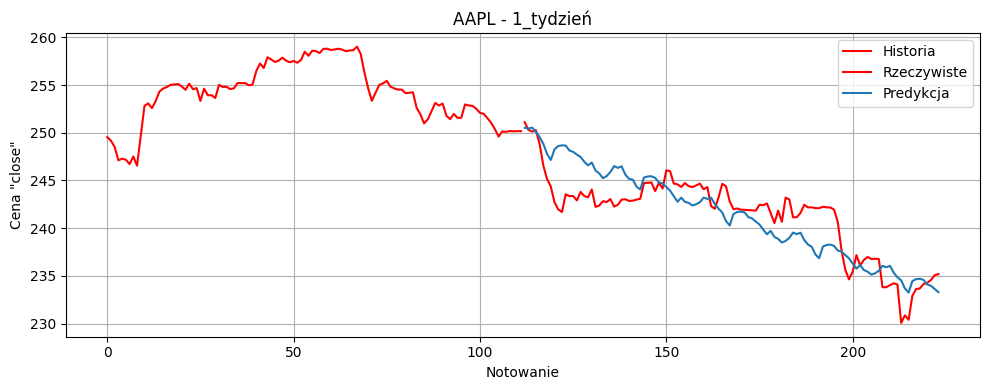

2_tygodnie | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/aapl\\aapl_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 1.05% | R2 = 0.8492


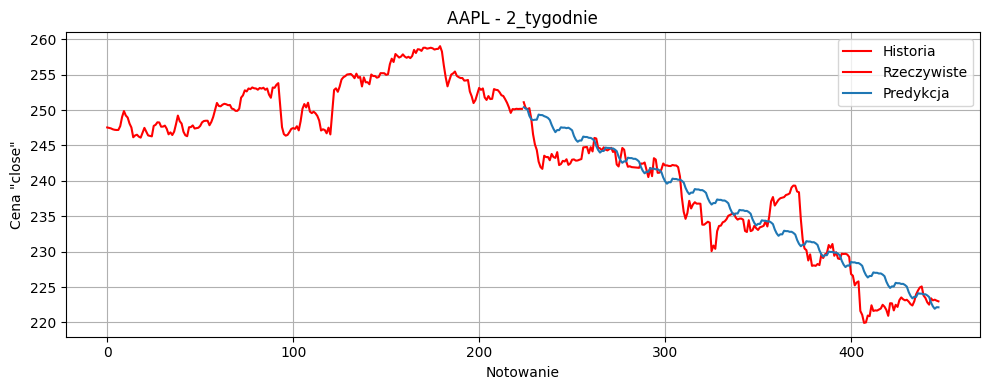

3_tygodnie | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/aapl\\aapl_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 2.92% | R2 = -0.2927


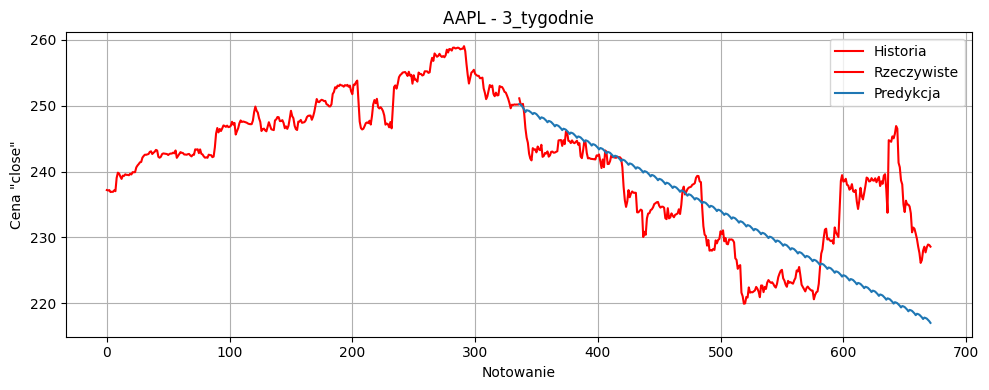

1_miesiąc | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/aapl\\aapl_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 2.78% | R2 = -0.4825


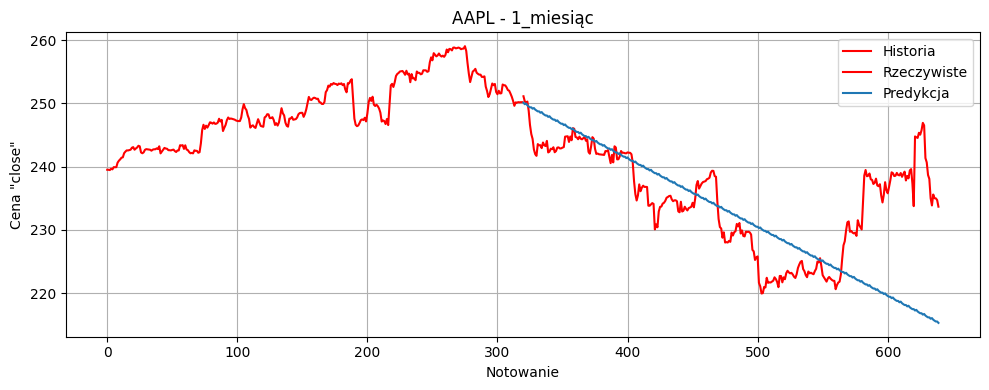

2_miesiące | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/aapl\\aapl_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 5.30% | R2 = -3.4003


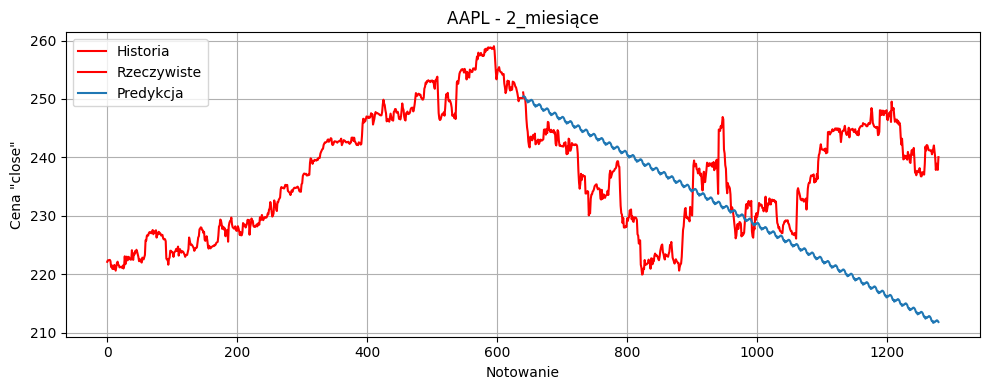

3_miesiące | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/aapl\\aapl_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 6.48% | R2 = -1.8540


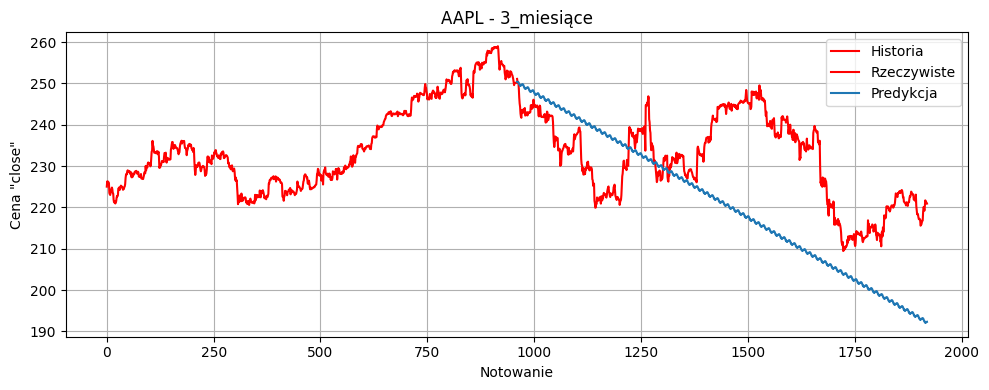

Przetwarzanie danych dla BTC...
{'1_tydzień': 168, '2_tygodnie': 336, '3_tygodnie': 504, '1_miesiąc': 744, '2_miesiące': 1488, '3_miesiące': 2160}
Sezonowość = (0, 0, 0, 0) - BTC...
Sezonowość = (0, 0, 0, 6) - BTC...
Sezonowość = (0, 0, 0, 12) - BTC...
Sezonowość = (0, 0, 0, 24) - BTC...
Sezonowość = (0, 0, 0, 168) - BTC...
Sezonowość = (0, 0, 1, 6) - BTC...
Sezonowość = (0, 0, 1, 12) - BTC...
Sezonowość = (0, 0, 1, 24) - BTC...
Sezonowość = (0, 1, 0, 6) - BTC...
Sezonowość = (0, 1, 0, 12) - BTC...
Sezonowość = (0, 1, 0, 24) - BTC...
Sezonowość = (0, 1, 1, 6) - BTC...
Sezonowość = (0, 1, 1, 12) - BTC...
Sezonowość = (0, 1, 1, 24) - BTC...
Sezonowość = (1, 0, 0, 6) - BTC...
Sezonowość = (1, 0, 0, 12) - BTC...
Sezonowość = (1, 0, 0, 24) - BTC...
Sezonowość = (1, 0, 1, 6) - BTC...
Sezonowość = (1, 0, 1, 12) - BTC...
Sezonowość = (1, 0, 1, 24) - BTC...
Sezonowość = (1, 1, 0, 6) - BTC...
Sezonowość = (1, 1, 0, 12) - BTC...
Sezonowość = (1, 1, 0, 24) - BTC...
Sezonowość = (1, 1, 1, 6) - BTC.

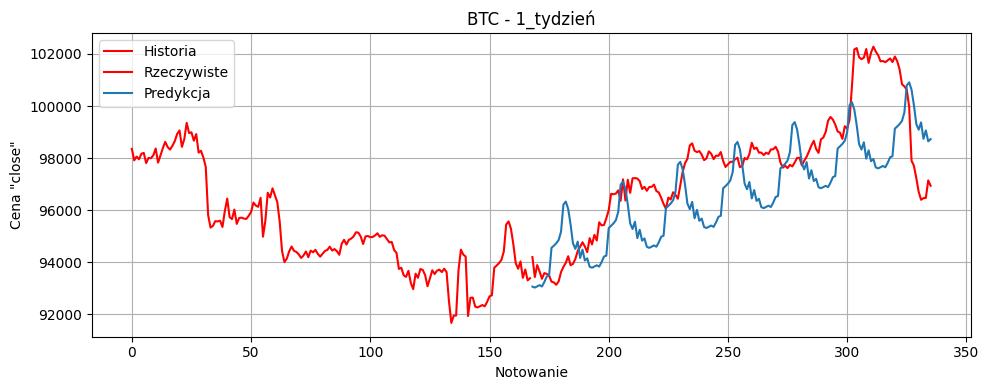

2_tygodnie | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/btc\\btc_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 2.52% | R2 = -0.5853


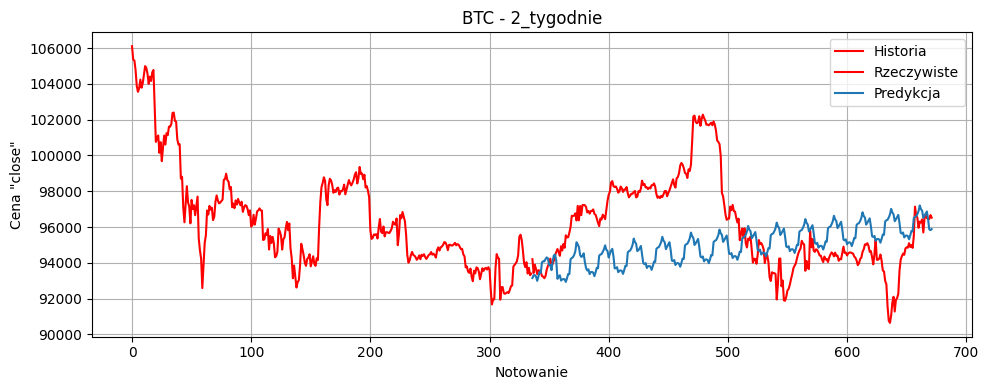

3_tygodnie | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/btc\\btc_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 3.44% | R2 = -0.1579


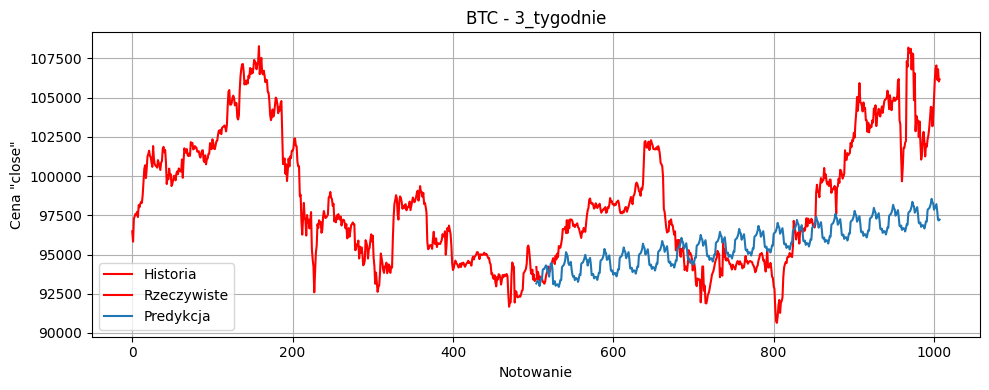

1_miesiąc | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/btc\\btc_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 3.90% | R2 = -0.1968


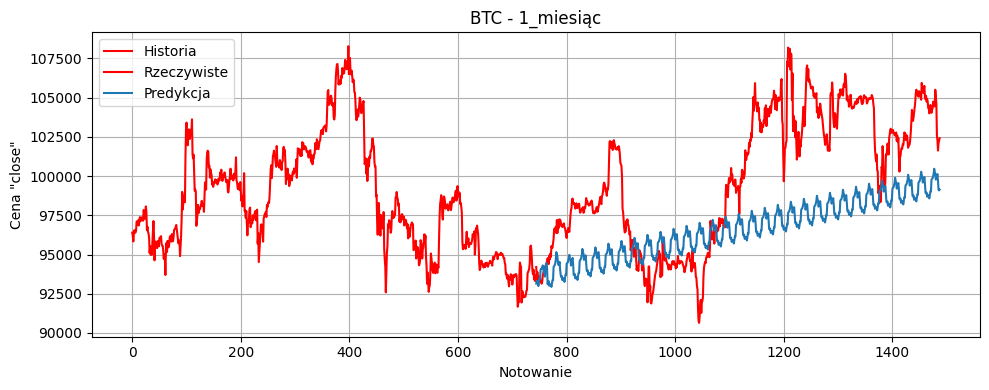

2_miesiące | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/btc\\btc_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 5.26% | R2 = -0.4532


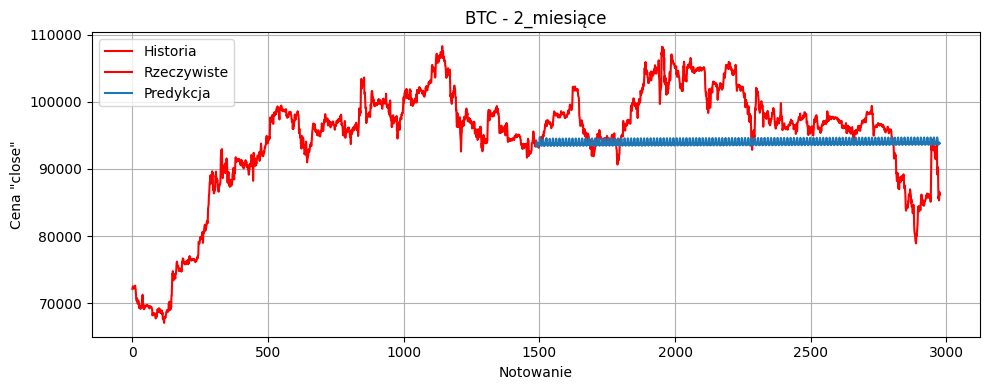

3_miesiące | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/btc\\btc_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 7.09% | R2 = -0.0000


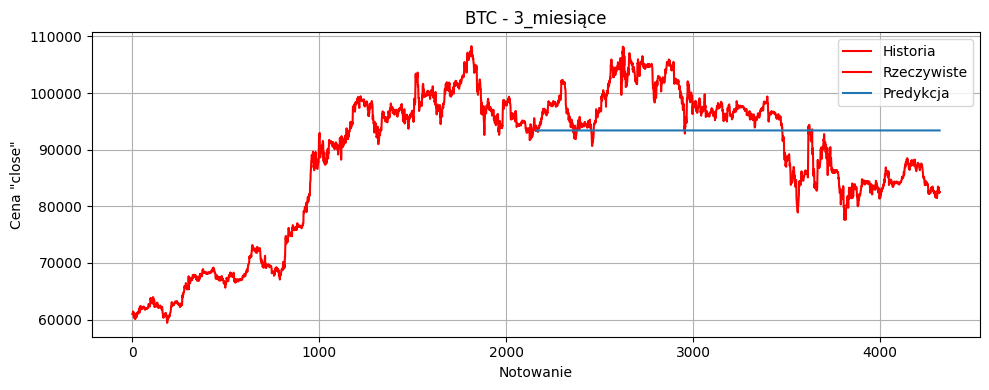

Przetwarzanie danych dla ETH...
{'1_tydzień': 168, '2_tygodnie': 336, '3_tygodnie': 504, '1_miesiąc': 744, '2_miesiące': 1488, '3_miesiące': 2160}
Sezonowość = (0, 0, 0, 0) - ETH...
Sezonowość = (0, 0, 0, 6) - ETH...
Sezonowość = (0, 0, 0, 12) - ETH...
Sezonowość = (0, 0, 0, 24) - ETH...
Sezonowość = (0, 0, 0, 168) - ETH...
Sezonowość = (0, 0, 1, 6) - ETH...
Sezonowość = (0, 0, 1, 12) - ETH...
Sezonowość = (0, 0, 1, 24) - ETH...
Sezonowość = (0, 1, 0, 6) - ETH...
Sezonowość = (0, 1, 0, 12) - ETH...
Sezonowość = (0, 1, 0, 24) - ETH...
Sezonowość = (0, 1, 1, 6) - ETH...
Sezonowość = (0, 1, 1, 12) - ETH...
Sezonowość = (0, 1, 1, 24) - ETH...
Sezonowość = (1, 0, 0, 6) - ETH...
Sezonowość = (1, 0, 0, 12) - ETH...
Sezonowość = (1, 0, 0, 24) - ETH...
Sezonowość = (1, 0, 1, 6) - ETH...
Sezonowość = (1, 0, 1, 12) - ETH...
Sezonowość = (1, 0, 1, 24) - ETH...
Sezonowość = (1, 1, 0, 6) - ETH...
Sezonowość = (1, 1, 0, 12) - ETH...
Sezonowość = (1, 1, 0, 24) - ETH...
Sezonowość = (1, 1, 1, 6) - ETH.

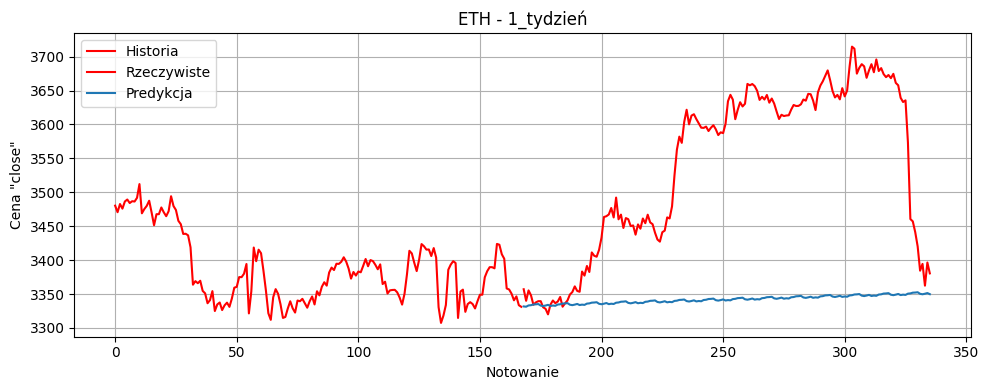

2_tygodnie | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/eth\\eth_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 4.20% | R2 = -0.2702


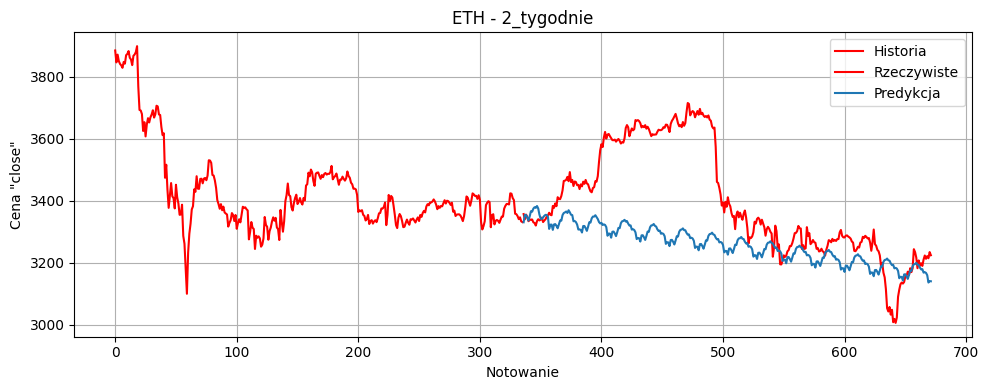

3_tygodnie | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/eth\\eth_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 3.44% | R2 = -0.0645


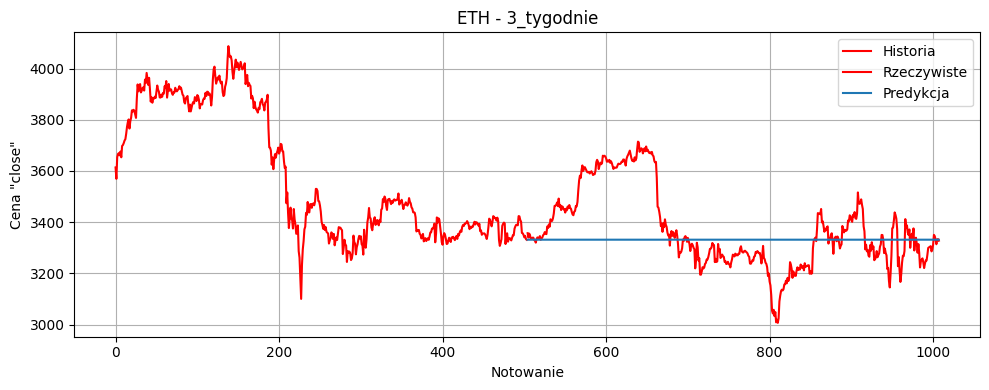

1_miesiąc | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/eth\\eth_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 3.31% | R2 = -0.0000


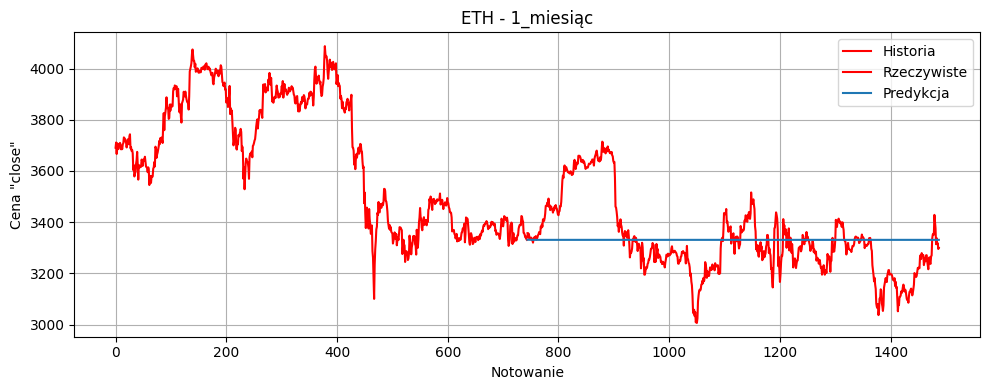

2_miesiące | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/eth\\eth_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 5.61% | R2 = 0.7341


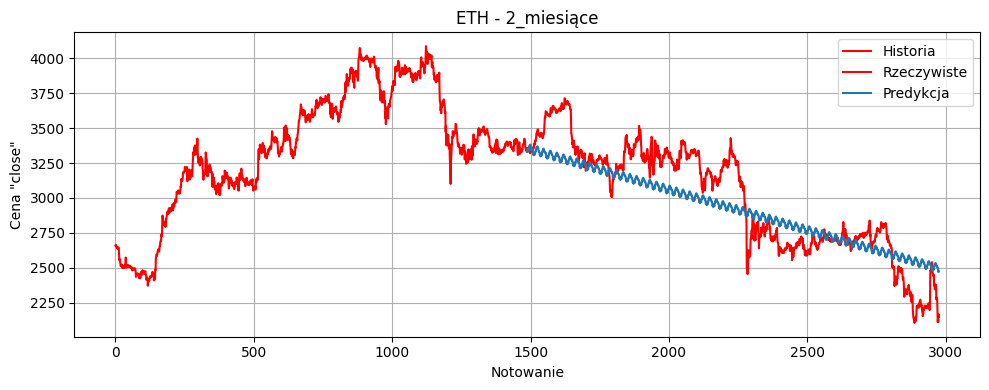

3_miesiące | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/eth\\eth_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 6.47% | R2 = 0.8609


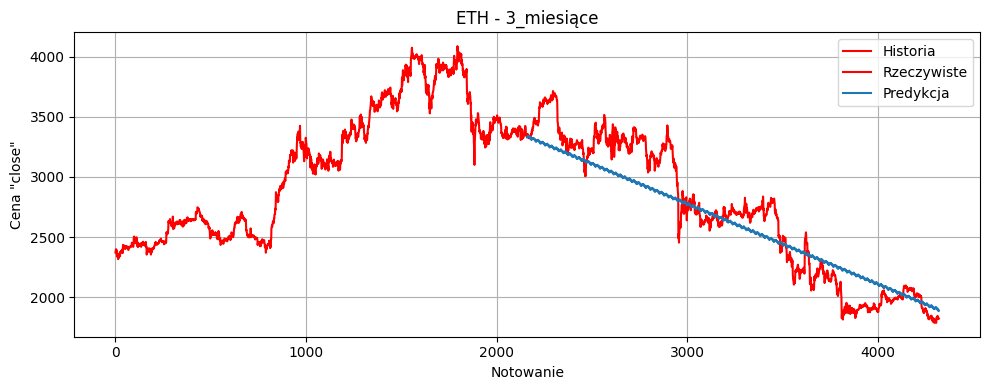

Przetwarzanie danych dla SPY...
{'1_tydzień': 119, '2_tygodnie': 238, '3_tygodnie': 357, '1_miesiąc': 340, '2_miesiące': 680, '3_miesiące': 1020}
Sezonowość = (0, 0, 0, 0) - SPY...
Sezonowość = (0, 0, 0, 6) - SPY...
Sezonowość = (0, 0, 0, 12) - SPY...
Sezonowość = (0, 0, 0, 24) - SPY...
Sezonowość = (0, 0, 0, 119) - SPY...
Sezonowość = (0, 0, 1, 6) - SPY...
Sezonowość = (0, 0, 1, 12) - SPY...
Sezonowość = (0, 0, 1, 24) - SPY...
Sezonowość = (0, 1, 0, 6) - SPY...
Sezonowość = (0, 1, 0, 12) - SPY...
Sezonowość = (0, 1, 0, 24) - SPY...
Sezonowość = (0, 1, 1, 6) - SPY...
Sezonowość = (0, 1, 1, 12) - SPY...
Sezonowość = (0, 1, 1, 24) - SPY...
Sezonowość = (1, 0, 0, 6) - SPY...
Sezonowość = (1, 0, 0, 12) - SPY...
Sezonowość = (1, 0, 0, 24) - SPY...
Sezonowość = (1, 0, 1, 6) - SPY...
Sezonowość = (1, 0, 1, 12) - SPY...
Sezonowość = (1, 0, 1, 24) - SPY...
Sezonowość = (1, 1, 0, 6) - SPY...
Sezonowość = (1, 1, 0, 12) - SPY...
Sezonowość = (1, 1, 0, 24) - SPY...
Sezonowość = (1, 1, 1, 6) - SPY..

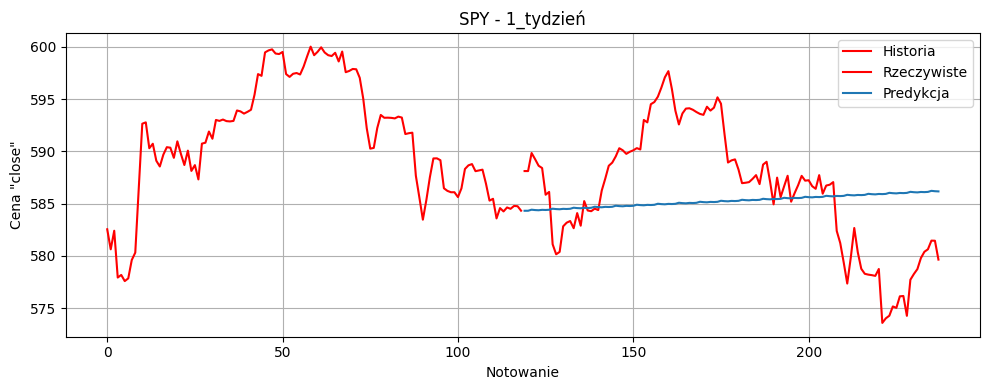

2_tygodnie | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/spy\\spy_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 1.20% | R2 = -0.0150


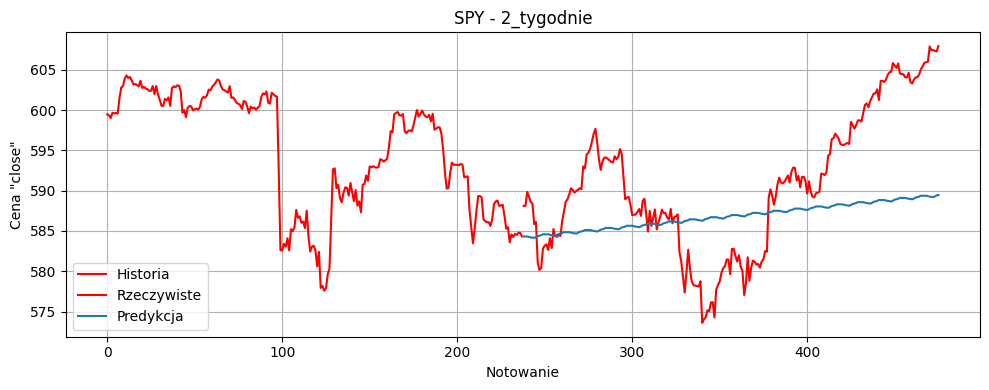

3_tygodnie | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/spy\\spy_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 1.36% | R2 = -0.1505


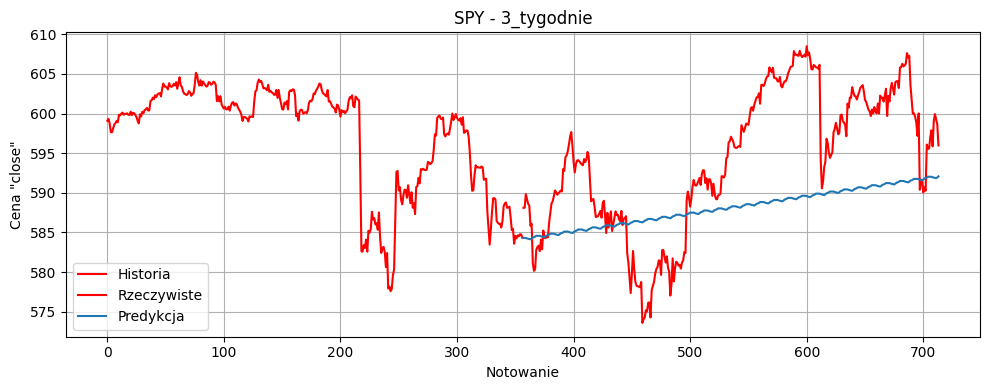

1_miesiąc | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/spy\\spy_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 1.39% | R2 = -0.1467


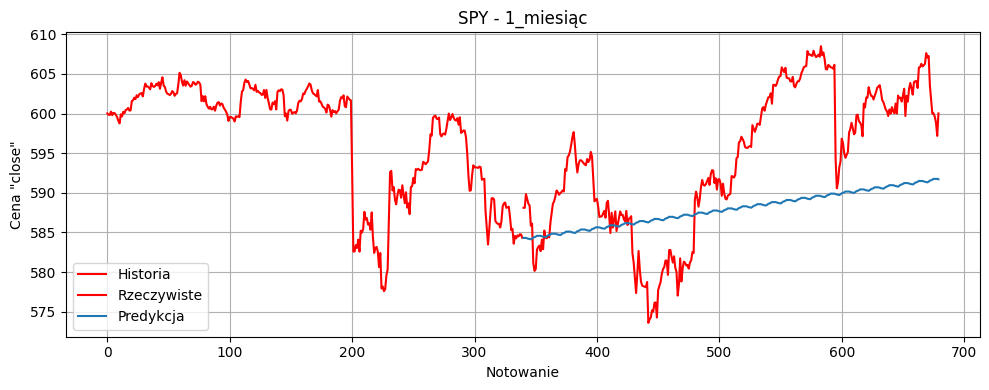

2_miesiące | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/spy\\spy_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 1.39% | R2 = -0.2056


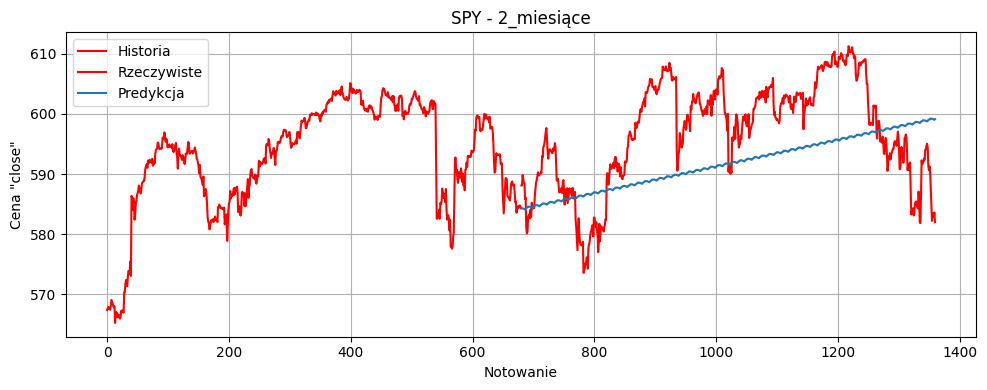

3_miesiące | Sezonowość = (1, 1, <_io.TextIOWrapper name='wyniki_predykcjiBJ/spy\\spy_3msc_BJ_metrics.txt' mode='w' encoding='cp1250'>, 24) | MAPE = 2.64% | R2 = -0.0132


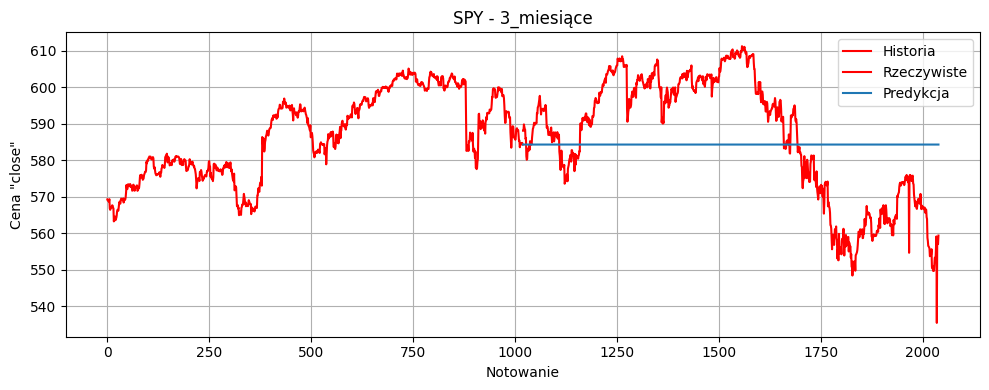

In [5]:
all_results = []
for name, path in DATASETS.items():
	print(f"Przetwarzanie danych dla {name}...")
	data, df_train, df_test = get_data(path)
	test_len = len(df_test)
	scaler = MinMaxScaler()

	train_scaled = scaler.fit_transform(df_train[['close']])
	# print(train_scaled)
	test_values = df_test[['close']].values

	forecast_ranges = {}
	for label, source in FORECAST_INTERVALS.items():
		val = source[name]
		forecast_ranges[label] = test_len if val == "test_len" else val
	print(forecast_ranges)
	results_table = []
	best_results = {}

	for k in [0, 1]:
		for l in [0, 1]:
			for f in [0, 1]:
				if k == 0 and l == 0 and f == 0:
					s_pos = [0, 6, 12, 24, FORECAST_INTERVALS["1_tydzień"][name]]
				else:
					s_pos = [6, 12, 24]
				for s in s_pos:
					print(f"Sezonowość = ({k}, {l}, {f}, {s}) - {name}...")

					model = SARIMAX(train_scaled, order=(2, 1, 0), seasonal_order=(k, l, f, s))
					results = model.fit()

					forecast = results.forecast(steps=test_len)
					predictions_rescaled = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()

					for range_name, range_len in forecast_ranges.items():
						# if range_len > len(predictions_rescaled):
							# continue
						pred_slice = predictions_rescaled[:range_len].flatten()
						real_slice = test_values[:range_len].flatten()
						history_slice = df_train['close'].values[-range_len:]

						mape = np.mean(np.abs((real_slice - pred_slice) / real_slice)) * 100
						r2 = r2_score(real_slice, pred_slice)

						results_table.append({
							"Instrument": name,
							"Zakres": range_name,
							"Sezonowość": f"({k}, {l}, {f}, {s})",
							"MAPE": mape,
							"R2": r2
						})

						if (range_name not in best_results) or (best_results[range_name]['MAPE'] > mape):
							best_results[range_name] = {
								"Sezonowość": f"({k}, {l}, {f}, {s})",
								"MAPE": mape,
								"R2": r2,
								"Predictions": pred_slice,
								"Real": real_slice,
								"History": history_slice
							}

	df_results = pd.DataFrame(results_table)
	print(f"\nTabela wyników dla {name} (wszystkie zakresy):\n")
	print(df_results.pivot_table(index='Sezonowość', columns='Zakres', values='MAPE').round(2))
	print(df_results.pivot_table(index='Sezonowość', columns='Zakres', values='R2').round(4))

	print(f"\nNajlepsze modele dla {name} (najniższe MAPE):\n")
	for range_name, res in best_results.items():
		print(f"{range_name} | Sezonowość = ({k}, {l}, {f}, {s}) | MAPE = {res['MAPE']:.2f}% | R2 = {res['R2']:.4f}")
		plot_prediction(res['Real'], res['Predictions'], res['History'], f"{name} - {range_name}")

		range_name_map = {
        	"1_tydzień": "tyg",
        	"2_tygodnie": "2tyg",
        	"3_tygodnie": "3tyg",
        	"1_miesiąc": "msc",
        	"2_miesiące": "2msc",
        	"3_miesiące": "3msc"
    	}	

		output_folder = f"wyniki_predykcjiBJ/{name.lower()}"
		os.makedirs(output_folder, exist_ok=True)

		for range_name, res in best_results.items():
			okres = range_name_map.get(range_name, range_name)
			podmiot = name.lower()

			# ZAPIS PREDYKCJI
			preds_filename = f"{podmiot}_{okres}_BJ.txt"
			preds_filepath = os.path.join(output_folder, preds_filename)
			np.savetxt(preds_filepath, res['Predictions'], fmt='%.6f')

			# ZAPIS METRYK
			metrics_filename = f"{podmiot}_{okres}_BJ_metrics.txt"
			metrics_filepath = os.path.join(output_folder, metrics_filename)
			with open(metrics_filepath, 'w') as f:
				f.write(f"{res['MAPE']:.4f}%\n")
				f.write(f"{res['R2']:.4f}\n")
		all_results.append(df_results)
